### Introduction

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

#### Task Details
An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

#### What do you have to do?
You are required to use the training dataset to identify patterns that predict “potential” defaulters.

#### Expected Submission
Submissions should be made in the same format as the Sample Notebook provided. Train/Test split should be 80% for training & 20% for testing.

#### Evaluation
Submissions will be evaluated on the basis of roc_auc_score on 20% of train_dataset.

#### NOTE
The test_dataset was just a part of the Hackathon, the notebook you will be submitting should only train & test on train_data and predict a higher score.
#### About Data
- ID: Id of the user(All Unique)
- Income: Income of the user
- Age: Age of the user
- Experience: Professional experience of the user in years
- Profession: Profession of the user
- Married/Single: Whether married or not
- House_Ownership: Owned or rented or neither
- Car_Ownership: Does the person own a car
- STATE: State of residence
- CITY: City of residence
- CURRENT_JOB_YRS: Years of experience in the current job
- CURRENT_HOUSE_YRS: Number of years in the current residence\
- Risk_Flag: Defaulted on a loan(Target variable)

#### Importing necessary library and set options

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pycalib
from pycalib import metrics
from sklearn.calibration import calibration_curve
%matplotlib inline
sns.set_theme(color_codes=True, style='darkgrid', 
              palette='deep', font='sans-serif')

## Importing Data and Data Cleansing

In [2]:
df = pd.read_csv("Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Exploring the data data type of each columns

In [3]:
df.CITY.value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Checking for null values

In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

There are no missing value in the datasets!

### Data Visualization 

### Distribution of Age

/Users/jacinth/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


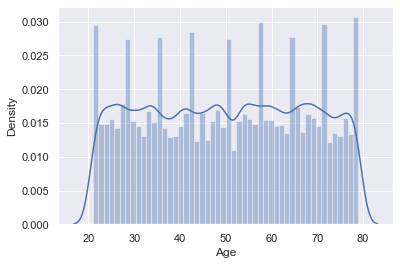

In [7]:
sns.distplot(a=df["Age"]);

### Effect of House ownership on Risk Flag

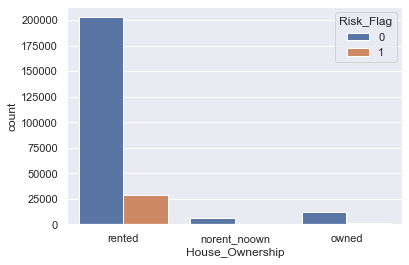

In [8]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df);

### Effect of Car owners on Risk Flag

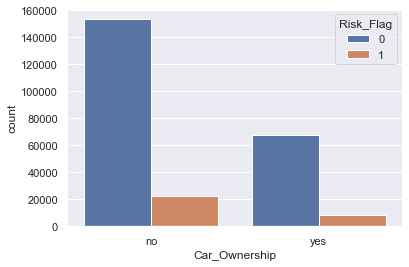

In [9]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df);

### Effect of Marital Status on Risk Flag

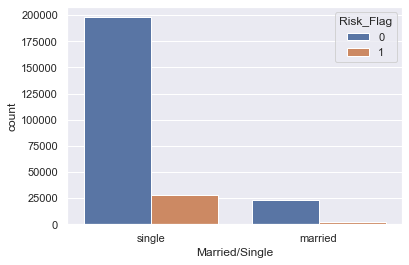

In [10]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df);

### Distribution of Income

/Users/jacinth/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


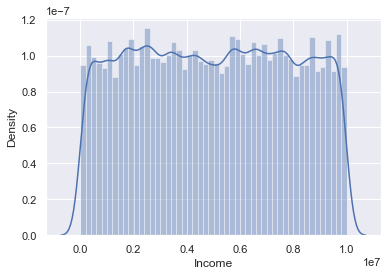

In [11]:
sns.distplot(a=df["Income"]);

### Relationship of Numerical variable on target variable

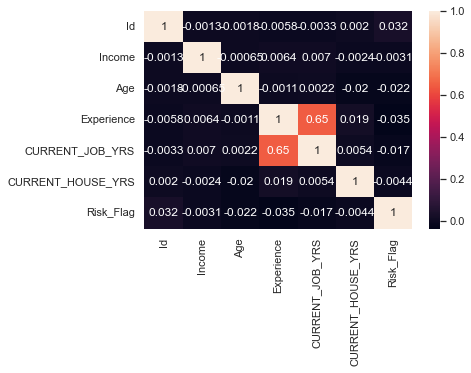

In [12]:
sns.heatmap(df.corr(), annot=True);

### Checking for Outliers

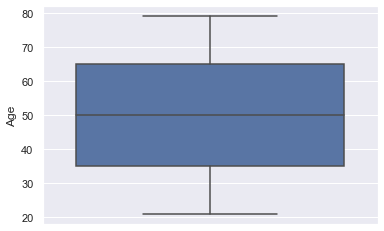

In [13]:
sns.boxplot(y = 'Age', data = df);

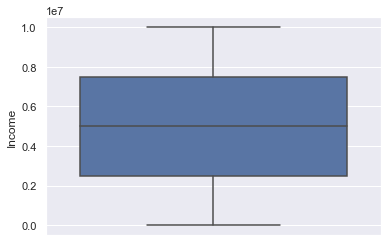

In [14]:
sns.boxplot(y = 'Income', data = df);

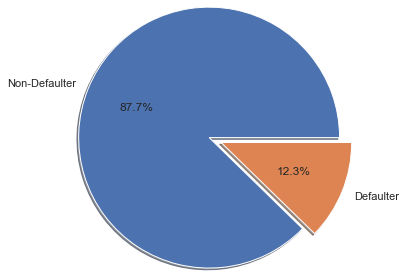

In [15]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

In [16]:
print(len(df.Profession.unique()))
print(len(df.STATE.unique()))
print(len(df.CITY.unique()))

51
29
317


### Summary on Data Visualization
- Class 0 represents 88.00% of the dataset, while class 1 only 12.00%. The classes are heavily skewed we need to solve this issue
- There are no outliers in datasets. But we need to scale Age and Income
- Strong correlation between Experience and CURRENT_JOB_YRS May drop one column during feature selection process or use Principal Component Analysis (PCA)
- Married/Single House_Ownership Car_Ownership can be binarised or one-hot encoded
- We can find the relationship between target variable and categorical variable using Chi-square test

### Feature Engineering

Helping function for hypothesis testing

In [17]:
def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

### Chi Square Test

In [18]:
car_ownership_risk_flag = pd.crosstab(df["Car_Ownership"], df["Risk_Flag"])
car_ownership_risk_flag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [19]:
chi_square_test(car_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


In [20]:
marital_status_risk_flag = pd.crosstab(df["Married/Single"], df["Risk_Flag"])
marital_status_risk_flag

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


In [21]:
chi_square_test(marital_status_risk_flag)

p value is 3.773053705715196e-26
Dependent (reject H0)


In [22]:
house_ownership_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"])
house_ownership_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [23]:
chi_square_test(house_ownership_risk_flag)

p value is 1.8381930028370595e-40
Dependent (reject H0)


### Performing Principal Component Analysis on CURRENT_JOB_YRS and Experience

In [24]:
features = ["CURRENT_JOB_YRS","Experience"]

df_for_pca = df[features]
scaled_df_for_pca = (df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

,CURRENT_JOB_YRS,Experience
0,-0.914129,-1.180230
1,0.731035,-0.014067
2,-0.639935,-1.013635
3,-1.188323,-1.346825
4,-0.914129,0.152528
...,...,...
251995,-0.091547,0.485718
251996,-0.091547,-0.014067
251997,0.182647,-0.513851
251998,-1.736711,-1.680014


In [25]:
pca = PCA()
df_pca = pca.fit_transform(scaled_df_for_pca)
component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)

df_pca.head()

,PC1,PC2
0,-1.480935,-0.188162
1,0.506973,-0.526866
2,-1.169251,-0.264246
3,-1.792620,-0.112078
4,-0.538533,0.754240


In [26]:
df1 = pd.concat([df,df_pca],axis=1)
df1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,PC1,PC2
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,-1.480935,-0.188162
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.506973,-0.526866
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,-1.169251,-0.264246
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,-1.792620,-0.112078
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,-0.538533,0.754240


Label encoding for categorical variables

In [27]:
features = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
label_encoder = LabelEncoder()

for col in features:
    df1[col] = label_encoder.fit_transform(df1[col])

In [28]:
df2 = pd.get_dummies(df1, columns = ["House_Ownership"])
df2.drop(["Id"],axis=1,inplace=True)

In [29]:
X = df2.drop(['Risk_Flag'],axis=1)
y = df2.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
sm = SMOTE(random_state = 500)
X_res, y_res = sm.fit_resample(X_train, y_train)

Now the data is ready for implementation of Machine Learning model!!<br>
Since the target variable is either 0 or 1, So we will use ml models which is suitable for binary classification

### Machine learning model for Binary classification 

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(max_iter = 500000)
lreg.fit(X_res, y_res)
lr_pred = lreg.predict(X_test)
accuracy = lreg.score(X_test, y_test)
accuracy

0.8774867724867725

In [32]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66338
           1       0.00      0.00      0.00      9262

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
indexes = y_test.index.values
indexes = indexes.tolist()

In [34]:
y_true = [[] for i in range(len(indexes))]
lr_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    y_true[i] = (indexes[i], y_test.values[i])
    lr_prediction[i] = (indexes[i], lr_pred[i])
# y_true
# pred

In [35]:
scores_lr = lreg.predict_proba(X_test)
scores_lr

array([[0.50175004, 0.49824996],
       [0.50193284, 0.49806716],
       [0.50241599, 0.49758401],
       ...,
       [0.5014805 , 0.4985195 ],
       [0.5004417 , 0.4995583 ],
       [0.50150131, 0.49849869]])

In [36]:
# Calculate the ECE value of lreg
pycalib.metrics.binary_ECE(y_test.values, scores_lr[:,1], bins=15)

0.3761368322971411

In [37]:
# brier score
pycalib.metrics.brier_score(y_test.values, lr_pred)

0.12251322751322752

In [38]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, lr_pred)

4.231456970498185

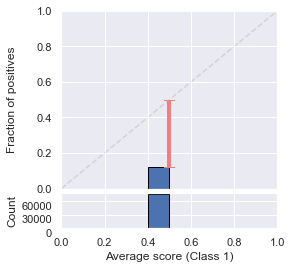

In [39]:
from pycalib.visualisations import plot_reliability_diagram

fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr.png')

### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_clf.fit(X_res, y_res)
knn_pred = knn_clf.predict(X_test)
accuracy = knn_clf.score(X_test, y_test)
accuracy

0.8587169312169313

In [41]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     66338
           1       0.44      0.58      0.50      9262

    accuracy                           0.86     75600
   macro avg       0.69      0.74      0.71     75600
weighted avg       0.88      0.86      0.87     75600



In [42]:
knn_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    knn_prediction[i] = (indexes[i], knn_pred[i])

In [43]:
scores_knn = knn_clf.predict_proba(X_test)
scores_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [44]:
# Calculate the ECE value of knn
pycalib.metrics.binary_ECE(y_test.values, scores_knn[:,1], bins=15)

0.0672142857142857

In [45]:
# brier score
pycalib.metrics.brier_score(y_test.values, knn_pred)

0.1412830687830688

In [46]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, knn_pred)

4.879815830056436

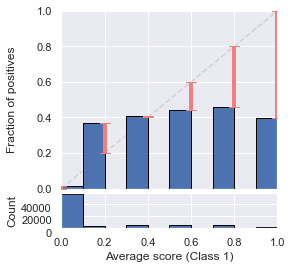

In [47]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn.png')

### Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=420)
rf_clf.fit(X_res, y_res)
rf_pred = rf_clf.predict(X_test)
accuracy = rf_clf.score(X_test, y_test)
accuracy

0.8830026455026455

In [49]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.63      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



In [50]:
rf_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    rf_prediction[i] = (indexes[i], rf_pred[i])

In [51]:
scores_rf = rf_clf.predict_proba(X_test)
scores_rf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [52]:
# Calculate the ECE value of random forest
pycalib.metrics.binary_ECE(y_test.values, scores_rf[:,1], bins=15)

0.08041684908643894

In [53]:
# brier score
pycalib.metrics.brier_score(y_test.values, rf_pred)

0.1169973544973545

In [54]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, rf_pred)

4.041019915070056

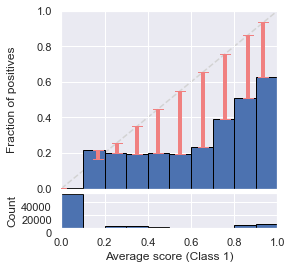

In [55]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf.png')

### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion="entropy",random_state=420)
dt_clf.fit(X_res, y_res)
dt_pred = dt_clf.predict(X_test)
accuracy = dt_clf.score(X_test, y_test)
accuracy

0.8658201058201058

In [57]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66338
           1       0.47      0.85      0.61      9262

    accuracy                           0.87     75600
   macro avg       0.73      0.86      0.76     75600
weighted avg       0.92      0.87      0.88     75600



In [58]:
dt_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    dt_prediction[i] = (indexes[i], dt_pred[i])

In [59]:
scores_dt = dt_clf.predict_proba(X_test)
scores_dt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [60]:
# Calculate the ECE value of decision tree
pycalib.metrics.binary_ECE(y_test.values, scores_dt[:,1], bins=15)

0.11444102231003472

In [61]:
# brier score
pycalib.metrics.brier_score(y_test.values, dt_pred)

0.13417989417989418

In [62]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, dt_pred)

4.634502119304719

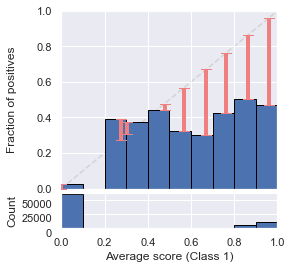

In [63]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt.png')

### XGBoost

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
xgb.fit(X_res, y_res)
xgb_pred = xgb.predict(X_test)
accuracy = xgb.score(X_test, y_test)
accuracy

0.8908862433862433

In [65]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     66338
           1       0.54      0.78      0.64      9262

    accuracy                           0.89     75600
   macro avg       0.75      0.84      0.79     75600
weighted avg       0.91      0.89      0.90     75600



In [66]:
xgb_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    xgb_prediction[i] = (indexes[i], xgb_pred[i])

In [67]:
scores_xgb = xgb.predict_proba(X_test)
scores_xgb

array([[0.9423461 , 0.05765391],
       [0.96357423, 0.03642577],
       [0.9214604 , 0.07853959],
       ...,
       [0.9293385 , 0.07066147],
       [0.88660955, 0.11339046],
       [0.82631844, 0.17368156]], dtype=float32)

In [68]:
# Calculate the ECE value of xgb
pycalib.metrics.binary_ECE(y_test.values, scores_xgb[:,1], bins=15)

0.09811790705062251

In [69]:
# brier score
pycalib.metrics.brier_score(y_test.values, xgb_pred)

0.10911375661375661

In [70]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, xgb_pred)

3.768721512889068

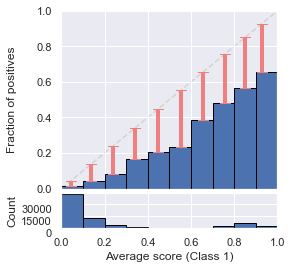

In [71]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb.png')

### AdaBoost Classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=15000)
ada.fit(X_res, y_res)
ada_pred = ada.predict(X_test)
accuracy = ada.score(X_test, y_test)
accuracy

0.5624206349206349

In [73]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70     66338
           1       0.14      0.52      0.23      9262

    accuracy                           0.56     75600
   macro avg       0.52      0.54      0.46     75600
weighted avg       0.80      0.56      0.64     75600



In [74]:
ada_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    ada_prediction[i] = (indexes[i], ada_pred[i])

In [75]:
scores_ada = ada.predict_proba(X_test)
scores_ada

array([[0.50019055, 0.49980945],
       [0.50125939, 0.49874061],
       [0.4975772 , 0.5024228 ],
       ...,
       [0.50135789, 0.49864211],
       [0.49960631, 0.50039369],
       [0.50029522, 0.49970478]])

In [76]:
# Calculate the ECE value of ada
pycalib.metrics.binary_ECE(y_test.values, scores_ada[:,1], bins=15)

0.37703564034784726

In [77]:
# brier score
pycalib.metrics.brier_score(y_test.values, ada_pred)

0.43757936507936507

In [78]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, ada_pred)

15.113758793508378

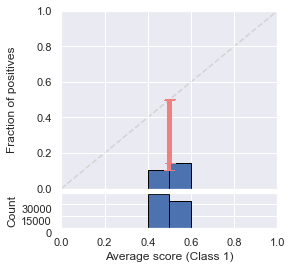

In [79]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada.png')

### Passive Aggressive Classifier

In [80]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(random_state=14500)
pac.fit(X_res, y_res)
pac_pred = pac.predict(X_test)
accuracy = pac.score(X_test, y_test)
accuracy

0.8142328042328042

In [81]:
print(classification_report(y_test,pac_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     66338
           1       0.13      0.09      0.11      9262

    accuracy                           0.81     75600
   macro avg       0.50      0.50      0.50     75600
weighted avg       0.79      0.81      0.80     75600



In [82]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(random_state=14500)
bag.fit(X_res, y_res)
bag_pred = bag.predict(X_test)
accuracy = bag.score(X_test, y_test)
accuracy

0.8773015873015872

In [83]:
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.50      0.82      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600



In [84]:
bag_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    bag_prediction[i] = (indexes[i], bag_pred[i])

In [85]:
scores_bag = bag.predict_proba(X_test)
scores_bag

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [86]:
# Calculate the ECE value of BaggingClassifier
pycalib.metrics.binary_ECE(y_test.values, scores_bag[:,1], bins=15)

0.08727207502924735

In [87]:
# brier score
pycalib.metrics.brier_score(y_test.values, bag_pred)

0.1226984126984127

In [88]:
# cross-entropy (log loss)
pycalib.metrics.cross_entropy(y_test.values, bag_pred)

4.237933507624874

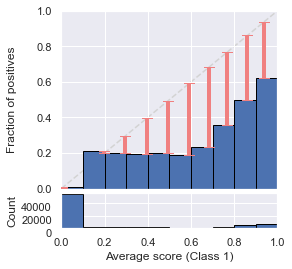

In [89]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag.png')

### Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_res, y_res)
gb_pred = gb.predict(X_test)
accuracy = gb.score(X_test, y_test)
accuracy

0.5946428571428571

In [91]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.91      0.60      0.72     66338
           1       0.17      0.59      0.26      9262

    accuracy                           0.59     75600
   macro avg       0.54      0.59      0.49     75600
weighted avg       0.82      0.59      0.66     75600



In [92]:
gb_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    gb_prediction[i] = (indexes[i], gb_pred[i])

In [93]:
scores_gb = gb.predict_proba(X_test)
scores_gb

array([[0.49658415, 0.50341585],
       [0.53879003, 0.46120997],
       [0.43502711, 0.56497289],
       ...,
       [0.62014514, 0.37985486],
       [0.4365259 , 0.5634741 ],
       [0.43995893, 0.56004107]])

In [94]:
pycalib.metrics.binary_ECE(y_test.values, scores_gb[:,1], bins=15)

0.34469389298145686

In [95]:
pycalib.metrics.brier_score(y_test.values, gb_pred)

0.40535714285714286

In [96]:
pycalib.metrics.cross_entropy(y_test.values, gb_pred)

14.000823637770557

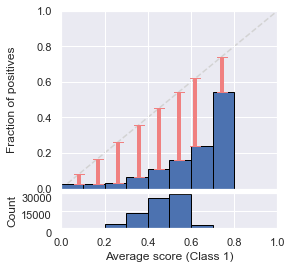

In [97]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb.png')

### Extra Tree

In [98]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(criterion="entropy",random_state=15000)
extra.fit(X_res, y_res)
extra_pred = extra.predict(X_test)
accuracy = extra.score(X_test, y_test)
accuracy

0.8806216931216931

In [99]:
print(classification_report(y_test,extra_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66338
           1       0.51      0.81      0.62      9262

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



In [100]:
extra_prediction = [[] for i in range(len(indexes))]
for i in range(len(indexes)):
    extra_prediction[i] = (indexes[i], extra_pred[i])

In [101]:
scores_extra = extra.predict_proba(X_test)
scores_extra

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [102]:
pycalib.metrics.binary_ECE(y_test.values, scores_extra[:,1], bins=15)

0.08088565716864496

In [103]:
pycalib.metrics.brier_score(y_test.values, extra_pred)

0.11937830687830688

In [104]:
pycalib.metrics.cross_entropy(y_test.values, extra_pred)

4.123257529600384

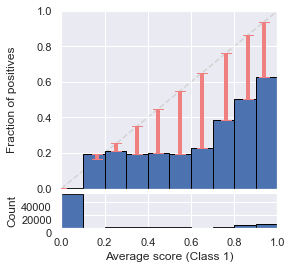

In [105]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_extra, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et.png')

### Conclusion
XGBoost is the best suitable model for our dataset with accuracy 89%, Alternatively Random Forest and Extra Tree Classifier can also consider, since they gives accuracy of 88%.

# Hypothesis test

In [106]:
from scipy.stats import percentileofscore
from sklearn.preprocessing import label_binarize
import numpy as np

def label_resampling(probs):
    return np.random.binomial(1, probs)

def score_sampling(probs, samples = 10000, ece_function = None):
    probs = np.array(probs)
    return np.array(
        [
            ece_function(label_resampling(probs), probs) for sample in range(samples)
        ]
    )

def pECE(y_true, probs, samples = 10000, ece_function = pycalib.metrics.binary_ECE):
    probs = np.array(probs)
    return 1 - (
        percentileofscore(
            score_sampling(
                probs,
                samples=samples,
                ece_function=ece_function
            ),
            ece_function(y_true, probs)
        ) / 100
    )

In [107]:
pECE(y_test, scores_lr[:,1])

0.0

In [108]:
pECE(y_test, scores_knn[:,1])

0.0

In [109]:
pECE(y_test, scores_xgb[:,1])

0.0

In [110]:
pECE(y_test, scores_rf[:,1])

0.0

In [111]:
pECE(y_test, scores_dt[:,1])

0.0

In [112]:
pECE(y_test, scores_ada[:,1])

0.0

In [113]:
pECE(y_test, scores_bag[:,1])

0.0

In [114]:
pECE(y_test, scores_gb[:,1])

0.0

In [115]:
pECE(y_test, scores_extra[:,1])

0.0

# Reliability Diagram

In [116]:
classifiers = {"Logistic Regression": lreg,
               "KNN": knn_clf,
               "Random Forest": rf_clf,
               "Decision Tree": dt_clf,
               "XGBoost": xgb,
               "AdaBoost": ada,
               "Bagging": bag,
               "Gradient Boosting": gb,
               "Extra Tree": extra}

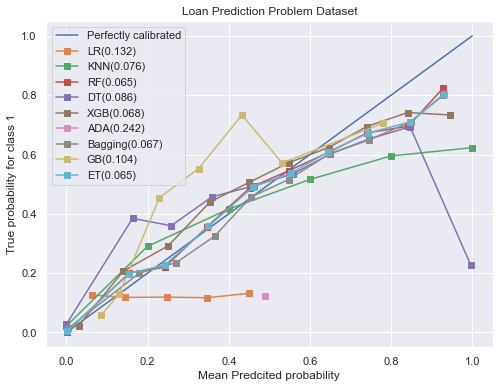

In [117]:
from sklearn.datasets import make_classification as mc
from sklearn.metrics import brier_score_loss # 导入布里尔分数
from sklearn.calibration import calibration_curve # 对概率类模型进行校准，方法是分箱

model = ["LR", "KNN", "RF", "DT", "XGB", "ADA", "Bagging", "GB", "ET"]
#开始画图
fig,ax1 = plt.subplots(figsize = (8,6))
ax1.plot([0,1],[0,1],label = "Perfectly calibrated") # 绘制对角线，把（0，0），（1，1）连起来
for clf,name_ in zip([lreg, knn_clf, rf_clf, dt_clf, xgb, ada, bag, gb, extra],model):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf,"predict_proba"): #对象里如果有这个接口
        prob_pos = clf.predict_proba(X_test)[:,1]
    else: #就是针对SVM
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())  #手动归一化
    clf_score = brier_score_loss(y_test,prob_pos,pos_label=y.max())
    #对只有0，1的标签值进行分箱后才能画图
    trueproba, predproba = calibration_curve(y_test, prob_pos, n_bins=10)
    ax1.plot(predproba,trueproba,"s-",label = "%s(%1.3f)"%(name_,clf_score))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean Predcited probability")
    ax1.set_ylim([-0.05,1.05])
    ax1.legend()
plt.title('Loan Prediction Problem Dataset')
plt.savefig('rd5.png')
plt.show()

# Calibration

In [118]:
from __future__ import division
import numpy as np

from scipy.special import expit

from sklearn.base import clone
from sklearn.utils import check_X_y, indexable
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import _SigmoidCalibration
from sklearn.metrics import log_loss

import warnings

from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted
from inspect import signature
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import check_cv


from betacal import BetaCalibration


class _DummyCalibration(BaseEstimator, RegressorMixin):
    """Dummy Calibration model. The purpose of this class is to give
    the CalibratedClassifierCV class the option to just return the
    probabilities of the base classifier.
    """
    def fit(self, *args, **kwargs):
        """Does nothing"""
        return self

    def predict_proba(self, T):
        """Return the probabilities of the base classifier"""
        return T

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


class IsotonicCalibration(IsotonicRegression):
    def __init__(self):
        super(IsotonicCalibration, self).__init__(y_min=0.0, y_max=1.0,
                                                  increasing=True,
                                                  out_of_bounds='clip')

    def fit(self, scores, y, *args, **kwargs):
        '''
        Score=0 corresponds to y=0, and score=1 to y=1
        Parameters
        ----------
        scores : array-like, shape = [n_samples,]
            Data.
        y : array-like, shape = [n_samples, ]
            Labels.
        Returns
        -------
        self
        '''
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        return super(IsotonicCalibration, self).fit(scores, y, *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        transformed = self.transform(scores, *args, **kwargs)
        if len(transformed.shape) == 1:
            transformed = np.vstack((1 - transformed, transformed)).T
        return transformed

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


def logit(x):
    eps = np.finfo(x.dtype).eps
    x = np.clip(x, eps, 1-eps)
    return np.log(x/(1 - x))


def log_encode(x):
    eps = np.finfo(x.dtype).eps
    x = np.clip(x, eps, 1)
    return np.log(x)


class LogisticCalibration(LogisticRegression):
    def __init__(self, C=1.0, solver='lbfgs', multi_class='multinomial',
                 log_transform=True):
        self.C_grid = C
        self.C = C if isinstance(C, float) else C[0]
        self.solver = solver
        self.log_transform = log_transform
        self.encode = log_encode if log_transform else logit
        self.multiclass = multi_class
        super(LogisticCalibration, self).__init__(C=C, solver=solver,
                                                  multi_class=multi_class)

    def fit(self, scores, y, X_val=None, y_val=None, *args, **kwargs):
        if isinstance(self.C_grid, list):
            calibrators = []
            losses = np.zeros(len(self.C_grid))
            for i, C in enumerate(self.C_grid):
                cal = LogisticCalibration(C=C, solver=self.solver,
                                          multi_class=self.multi_class,
                                          log_transform=self.log_transform)
                cal.fit(scores, y)
                losses[i] = log_loss(y_val, cal.predict_proba(X_val))
                calibrators.append(cal)
            best_idx = losses.argmin()
            self.C = calibrators[best_idx].C
        return super(LogisticCalibration, self).fit(self.encode(scores), y,
                                                    *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        return super(LogisticCalibration,
                     self).predict_proba(self.encode(scores), *args, **kwargs)

    def predict(self, scores, *args, **kwargs):
        return super(LogisticCalibration, self).predict(self.encode(scores),
                                                        *args, **kwargs)


class SigmoidCalibration(_SigmoidCalibration):
    def fit(self, scores, y, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        return super(SigmoidCalibration, self).fit(scores, y, *args, **kwargs)

    def predict_proba(self, scores, *args, **kwargs):
        if len(scores.shape) > 1:
            scores = scores[:, 1]
        transformed = super(SigmoidCalibration, self).predict(scores, *args, **kwargs)
        return np.vstack((1 - transformed, transformed)).T

    def predict(self, *args, **kwargs):
        proba = self.predict_proba(*args, **kwargs)
        return proba.argmax(axis=1)


class BinningCalibration(BaseEstimator, RegressorMixin):
    def __init__(self, n_bins=10, strategy='uniform', alpha=1.0):
        '''
        alpha : Laplace smoothing (x + a)/(N + 2a)
        n_bins: Number of bins
        stragegy:
                - uniform: for equal width bins
                - quantile: for equal frequency bins
                - kmeans: for each bin with same nearest center to a 1D k-means
        '''
        self.strategy = strategy
        self.n_bins = n_bins
        self.n_bins_grid = n_bins
        self.alpha = alpha

    def fit(self, scores, y, X_val=None, y_val=None, *args, **kwargs):
        '''
        Score=0 corresponds to y=0, and score=1 to y=1
        Parameters
        ----------
        scores : array-like, shape = [n_samples,]
            Data.
        y : array-like, shape = [n_samples, ]
            Labels.
        Returns
        -------
        self
        '''
        if isinstance(self.n_bins, list):
            if X_val is None or y_val is None:
                raise ValueError(('If n_bins is a list, scores_val and y_val'
                                  'are required during fit'))
            calibrators = []
            losses = []
            for n_bins in self.n_bins:
                cal = BinningCalibration(n_bins=n_bins, strategy=self.strategy,
                                         alpha=self.alpha)
                cal.fit(scores, y)
                predict = cal.predict_proba(X_val)
                losses.append(log_loss(y_val, predict))
                calibrators.append(cal)
            best_idx = np.argmin(losses)
            self.n_bins = calibrators[best_idx].n_bins
            self.bins = calibrators[best_idx].bins
            self.predictions = calibrators[best_idx].predictions
            return self

        if len(np.shape(scores)) > 1:
            scores = scores[:, 1]
        # TODO check that this code is correct:
        if self.strategy == 'quantile':
            self.bins = np.sort(scores)[::int(np.ceil(len(scores)
                                                      / self.n_bins))]
            self.bins = np.hstack([self.bins, scores[-1]])
        elif self.strategy == 'uniform':
            self.bins = np.linspace(scores.min(), scores.max(), self.n_bins+1)
        else:
            raise ValueError('Strategy {} not implemented'.format(
                                 self.strategy))
        self.bins[0] = - np.inf
        self.bins[-1] = np.inf
        s_binned = np.digitize(scores, self.bins) - 1
        self.predictions = np.zeros(self.n_bins)
        for i in range(self.n_bins):
            self.predictions[i] = ((np.sum(y[s_binned == i]) + self.alpha)
                                   / (np.sum(s_binned == i) + self.alpha*2))

        return self

    def predict_proba(self, scores, *args, **kwargs):
        if len(np.shape(scores)) > 1:
            scores = scores[:, 1]
        s_binned = np.digitize(scores, self.bins) - 1
        transformed = self.predictions[s_binned]
        return np.vstack((1 - transformed, transformed)).T

    def predict(self, scores, *args, **kwargs):
        proba = self.predict_proba(scores, *args, **kwargs)
        return proba.argmax(axis=1)


class CalibratedModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, calibrator=None,
                 fit_estimator=True):
        ''' Initialize a Calibrated model (classifier + calibrator)
        Parameters
        ----------
        base_estimator : estimator
            Classifier instance
        calibrator : estimator
            Calibrator instance
        '''
        self.calibrator = clone(calibrator)
        self.base_estimator = clone(base_estimator)
        self.fit_estimator = fit_estimator
        self.binary = False

    def fit(self, X, y, X_val=None, y_val=None, *args, **kwargs):
        """Fit the calibrated model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples, n_classes)
            Target values.
        Returns
        -------
        self : object
            Returns an instance of self.
        """

        X, y = check_X_y(X, y, accept_sparse=['csc', 'csr', 'coo'],
                         multi_output=True)
        X, y = indexable(X, y)

        if self.fit_estimator:
            self.base_estimator.fit(X, y)

        scores = self.base_estimator.predict_proba(X)

        if scores.shape[1] == 2:
            self.binary = True

        if self.binary:
            try:
                self.calibrator.fit(scores, y, *args, **kwargs)
            except ValueError:
                self.calibrator.fit(scores[:, 1], y, *args, **kwargs)
        else:
            self.calibrator.fit(scores, y, *args, **kwargs)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """

        scores = self.base_estimator.predict_proba(X)

        if self.binary:
            try:
                predictions = self.calibrator.predict_proba(scores)
            except ValueError:
                predictions = self.calibrator.predict_proba(scores[:, 1])

            if (len(predictions.shape) == 1) or (predictions.shape[1] == 1):
                predictions = np.vstack((1 - predictions, predictions)).T
        else:
            predictions = self.calibrator.predict_proba(scores)

        return predictions

    def predict(self, X):
        """Predict the target of new samples. Can be different from the
        prediction of the uncalibrated classifier.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples,)
            The predicted class.
        """
        check_is_fitted(self, ["calibrator"])

        return np.argmax(self.predict_proba(X), axis=1)


class CalibratedClassifierCV(BaseEstimator, ClassifierMixin):
    """Probability calibration with isotonic regression, sigmoid or beta.
    With this class, the base_estimator is fit on the train set of the
    cross-validation generator and the test set is used for calibration.
    The probabilities for each of the folds are then averaged
    for prediction. In case cv="prefit" is passed to __init__,
    it is assumed that base_estimator has been
    fitted already and all data is used for calibration. Note that
    data for fitting the classifier and for calibrating it must be disjoint.
    Read more in the :ref:`User Guide <calibration>`.
    Parameters
    ----------
    base_estimator : instance BaseEstimator
        The classifier whose output decision function needs to be calibrated
        to offer more accurate predict_proba outputs. If cv=prefit, the
        classifier must have been fit already on data.
    method : None, 'sigmoid', 'isotonic', 'beta', 'beta_am' or 'beta_ab'
        The method to use for calibration. Can be 'sigmoid' which
        corresponds to Platt's method, 'isotonic' which is a
        non-parameteric approach or 'beta', 'beta_am' or 'beta_ab' which
        correspond to three different beta calibration methods. It is
        not advised to use  isotonic  calibration with too few calibration
        samples ``(<<1000)`` since it tends to overfit.
        Use beta models in this case.
    cv : integer, cross-validation generator, iterable or "prefit", optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
        - None, to use the default 3-fold cross-validation,
        - integer, to specify the number of folds.
        - An object to be used as a cross-validation generator.
        - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If ``y`` is neither binary nor
        multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validation strategies that can be used here.
        If "prefit" is passed, it is assumed that base_estimator has been
        fitted already and all data is used for calibration.
    Attributes
    ----------
    classes_ : array, shape (n_classes)
        The class labels.
    calibrated_classifiers_: list (len() equal to cv or 1 if cv == "prefit")
        The list of calibrated classifiers, one for each cross-validation fold,
        which has been fitted on all but the validation fold and calibrated
        on the validation fold.
    References
    ----------
    .. [1] Obtaining calibrated probability estimates from decision trees
           and naive Bayesian classifiers, B. Zadrozny & C. Elkan, ICML 2001
    .. [2] Transforming Classifier Scores into Accurate Multiclass
           Probability Estimates, B. Zadrozny & C. Elkan, (KDD 2002)
    .. [3] Probabilistic Outputs for Support Vector Machines and Comparisons to
           Regularized Likelihood Methods, J. Platt, (1999)
    .. [4] Predicting Good Probabilities with Supervised Learning,
           A. Niculescu-Mizil & R. Caruana, ICML 2005
    """
    def __init__(self, base_estimator=None, method=None, cv=3,
                 score_type=None):
        self.base_estimator = base_estimator
        self.method = method
        self.cv = cv
        self.score_type = score_type

    def fit(self, X, y, sample_weight=None):
        """Fit the calibrated model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
        Returns
        -------
        self : object
            Returns an instance of self.
        """
        X, y = check_X_y(X, y, accept_sparse=['csc', 'csr', 'coo'],
                         force_all_finite=False)
        X, y = indexable(X, y)
        lb = LabelBinarizer().fit(y)
        self.classes_ = lb.classes_

        # Check that each cross-validation fold can have at least one
        # example per class
        n_folds = self.cv if isinstance(self.cv, int) \
            else self.cv.n_folds if hasattr(self.cv, "n_folds") else None
        if n_folds and \
           np.any([np.sum(y == class_) < n_folds for class_ in self.classes_]):
            raise ValueError("Requesting %d-fold cross-validation but provided"
                             " less than %d examples for at least one class."
                             % (n_folds, n_folds))

        self.calibrated_classifiers_ = []
        if self.base_estimator is None:
            # we want all classifiers that don't expose a random_state
            # to be deterministic (and we don't want to expose this one).
            base_estimator = LinearSVC(random_state=0)
        else:
            base_estimator = self.base_estimator

        if self.cv == "prefit":
            calibrated_classifier = _CalibratedClassifier(
                base_estimator, method=self.method, score_type=self.score_type)
            if sample_weight is not None:
                calibrated_classifier.fit(X, y, sample_weight)
            else:
                calibrated_classifier.fit(X, y)
            self.calibrated_classifiers_.append(calibrated_classifier)
        else:
            cv = check_cv(self.cv, y, classifier=True)
            fit_parameters = signature(base_estimator.fit).parameters
            estimator_name = type(base_estimator).__name__
            if (sample_weight is not None
                    and "sample_weight" not in fit_parameters):
                warnings.warn("%s does not support sample_weight. Samples"
                              " weights are only used for the calibration"
                              " itself." % estimator_name)
                base_estimator_sample_weight = None
            else:
                base_estimator_sample_weight = sample_weight
            for train, test in cv.split(X, y):
                this_estimator = clone(base_estimator)
                if base_estimator_sample_weight is not None:
                    this_estimator.fit(
                        X[train], y[train],
                        sample_weight=base_estimator_sample_weight[train])
                else:
                    this_estimator.fit(X[train], y[train])

                calibrated_classifier = _CalibratedClassifier(
                    this_estimator, method=self.method,
                    score_type=self.score_type)
                if sample_weight is not None:
                    calibrated_classifier.fit(X[test], y[test],
                                              sample_weight[test])
                else:
                    calibrated_classifier.fit(X[test], y[test])
                self.calibrated_classifiers_.append(calibrated_classifier)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        X = check_array(X, accept_sparse=['csc', 'csr', 'coo'],
                        force_all_finite=False)
        # Compute the arithmetic mean of the predictions of the calibrated
        # classfiers
        mean_proba = np.zeros((X.shape[0], len(self.classes_)))
        for calibrated_classifier in self.calibrated_classifiers_:
            proba = calibrated_classifier.predict_proba(X)
            mean_proba += proba

        mean_proba /= len(self.calibrated_classifiers_)

        return mean_proba

    def calibrate_scores(self, df):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        # Compute the arithmetic mean of the predictions of the calibrated
        # classifiers
        df = df.reshape(-1, 1)
        mean_proba = np.zeros((len(df), len(self.classes_)))
        for calibrated_classifier in self.calibrated_classifiers_:
            proba = calibrated_classifier.calibrate_scores(df)
            mean_proba += proba

        mean_proba /= len(self.calibrated_classifiers_)

        return mean_proba

    def predict(self, X):
        """Predict the target of new samples. Can be different from the
        prediction of the uncalibrated classifier.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples,)
            The predicted class.
        """
        check_is_fitted(self, ["classes_", "calibrated_classifiers_"])
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class _CalibratedClassifier(object):
    """Probability calibration with isotonic regression or sigmoid.
    It assumes that base_estimator has already been fit, and trains the
    calibration on the input set of the fit function. Note that this class
    should not be used as an estimator directly. Use CalibratedClassifierCV
    with cv="prefit" instead.
    Parameters
    ----------
    base_estimator : instance BaseEstimator
        The classifier whose output decision function needs to be calibrated
        to offer more accurate predict_proba outputs. No default value since
        it has to be an already fitted estimator.
    method : 'sigmoid' | 'isotonic' | 'beta' | 'beta_am' | 'beta_ab'
        The method to use for calibration. Can be 'sigmoid' which
        corresponds to Platt's method, 'isotonic' which is a
        non-parameteric approach based on isotonic regression or 'beta',
        'beta_am' or 'beta_ab' which correspond to beta calibration methods.
    References
    ----------
    .. [1] Obtaining calibrated probability estimates from decision trees
           and naive Bayesian classifiers, B. Zadrozny & C. Elkan, ICML 2001
    .. [2] Transforming Classifier Scores into Accurate Multiclass
           Probability Estimates, B. Zadrozny & C. Elkan, (KDD 2002)
    .. [3] Probabilistic Outputs for Support Vector Machines and Comparisons to
           Regularized Likelihood Methods, J. Platt, (1999)
    .. [4] Predicting Good Probabilities with Supervised Learning,
           A. Niculescu-Mizil & R. Caruana, ICML 2005
    """
    def __init__(self, base_estimator, method='beta',
                 score_type=None):
        self.base_estimator = base_estimator
        self.method = method
        self.score_type = score_type

    def _preproc(self, X):
        n_classes = len(self.classes_)
        if self.score_type is None:
            if hasattr(self.base_estimator, "decision_function"):
                df = self.base_estimator.decision_function(X)
                if df.ndim == 1:
                    df = df[:, np.newaxis]
            elif hasattr(self.base_estimator, "predict_proba"):
                df = self.base_estimator.predict_proba(X)
                if n_classes == 2:
                    df = df[:, 1:]
            else:
                raise RuntimeError('classifier has no decision_function or '
                                   'predict_proba method.')
        else:
            if self.score_type == "sigmoid":
                df = self.base_estimator.decision_function(X)
                df = expit(df)
                if df.ndim == 1:
                    df = df[:, np.newaxis]
            else:
                if hasattr(self.base_estimator, self.score_type):
                    df = getattr(self.base_estimator, self.score_type)(X)
                    if self.score_type == "decision_function":
                        if df.ndim == 1:
                            df = df[:, np.newaxis]
                    elif self.score_type == "predict_proba":
                        if n_classes == 2:
                            df = df[:, 1:]
                else:
                    raise RuntimeError('classifier has no ' + self.score_type
                                       + 'method.')

        idx_pos_class = np.arange(df.shape[1])

        return df, idx_pos_class

    def fit(self, X, y, sample_weight=None):
        """Calibrate the fitted model
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target values.
        sample_weight : array-like, shape = [n_samples] or None
            Sample weights. If None, then samples are equally weighted.
        Returns
        -------
        self : object
            Returns an instance of self.
        """
        lb = LabelBinarizer()
        Y = lb.fit_transform(y)
        self.classes_ = lb.classes_

        df, idx_pos_class = self._preproc(X)
        self.calibrators_ = []

        for k, this_df in zip(idx_pos_class, df.T):
            if self.method is None:
                calibrator = _DummyCalibration()
            elif self.method == 'isotonic':
                calibrator = IsotonicRegression(out_of_bounds='clip')
            elif self.method == 'sigmoid':
                calibrator = _SigmoidCalibration()
            # TODO Remove BetaCalibration
            elif self.method == 'beta':
                calibrator = BetaCalibration(parameters="abm")
            elif self.method == 'beta_am':
                calibrator = BetaCalibration(parameters="am")
            elif self.method == 'beta_ab':
                calibrator = BetaCalibration(parameters="ab")
            else:
                raise ValueError('method should be None, "sigmoid", '
                                 '"isotonic", "beta", "beta2" or "beta05". '
                                 'Got %s.' % self.method)
            calibrator.fit(this_df, Y[:, k], sample_weight)
            self.calibrators_.append(calibrator)

        return self

    def predict_proba(self, X):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """
        n_classes = len(self.classes_)
        proba = np.zeros((X.shape[0], n_classes))

        df, idx_pos_class = self._preproc(X)
        for k, this_df, calibrator in \
                zip(idx_pos_class, df.T, self.calibrators_):
            if n_classes == 2:
                k += 1
            proba[:, k] = calibrator.predict(this_df)

        # Normalize the probabilities
        if n_classes == 2:
            proba[:, 0] = 1. - proba[:, 1]
        else:
            proba /= np.sum(proba, axis=1)[:, np.newaxis]

        # XXX : for some reason all probas can be 0
        proba[np.isnan(proba)] = 1. / n_classes

        # Deal with cases where the predicted probability minimally exceeds 1.0
        proba[(1.0 < proba) & (proba <= 1.0 + 1e-5)] = 1.0

        return proba

    def calibrate_scores(self, df):
        """Posterior probabilities of classification
        This function returns posterior probabilities of classification
        according to each class on an array of test vectors X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The samples.
        Returns
        -------
        C : array, shape (n_samples, n_classes)
            The predicted probas. Can be exact zeros.
        """
        n_classes = len(self.classes_)
        proba = np.zeros((len(df), n_classes))
        idx_pos_class = [0]

        for k, this_df, calibrator in \
                zip(idx_pos_class, df.T, self.calibrators_):
            if n_classes == 2:
                k += 1
            pro = calibrator.predict(this_df)
            if np.any(np.isnan(pro)):
                pro[np.isnan(pro)] = calibrator.predict(this_df[np.isnan(
                    pro)] + 1e-300)
            proba[:, k] = pro

        # Normalize the probabilities
        if n_classes == 2:
            proba[:, 0] = 1. - proba[:, 1]
        else:
            proba /= np.sum(proba, axis=1)[:, np.newaxis]

        # XXX : for some reason all probas can be 0
        proba[np.isnan(proba)] = 1. / n_classes

        # Deal with cases where the predicted probability minimally exceeds 1.0
        proba[(1.0 < proba) & (proba <= 1.0 + 1e-5)] = 1.0
        return proba

In [119]:
def plot_calibration_curve(y_true, y_prob, n_bins=5, ax=None, hist=True, normalize=False):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, normalize=normalize)
    if ax is None:
        ax = plt.gca()
    if hist:
        ax.hist(y_prob, weights=np.ones_like(y_prob) / len(y_prob), alpha=.4,
               bins=np.maximum(10, n_bins))
    ax.plot([0, 1], [0, 1], ':', c='k')
    curve = ax.plot(prob_pred, prob_true, marker="o")

    ax.set_xlabel("predicted probability")
    ax.set_ylabel("fraction of positive samples")

    ax.set(aspect='equal')
    return curve

## 1. LR

In [120]:
# sigmoid
cal_lr_sigm = CalibratedClassifierCV(lreg, cv="prefit", method='sigmoid')
cal_lr_sigm.fit(X_test, y_test)
scores_lr_sigm = cal_lr_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_sigm_cv = CalibratedClassifierCV(lreg, method='sigmoid')
cal_lr_sigm_cv.fit(X_train, y_train)
scores_lr_sigm_cv = cal_lr_sigm_cv.predict_proba(X_test)

# isotonic
cal_lr_iso = CalibratedClassifierCV(lreg, cv="prefit", method='isotonic')
cal_lr_iso.fit(X_test, y_test)
scores_lr_iso = cal_lr_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_iso_cv = CalibratedClassifierCV(lreg, method='isotonic')
cal_lr_iso_cv.fit(X_train, y_train)
scores_lr_iso_cv = cal_lr_iso_cv.predict_proba(X_test)

# beta
cal_lr_beta = CalibratedClassifierCV(lreg, method='beta')
cal_lr_beta.fit(X_train, y_train)
scores_lr_beta = cal_lr_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_lr_beta_cv = CalibratedClassifierCV(lreg, cv="prefit", method='beta')
cal_lr_beta_cv.fit(X_test, y_test)
scores_lr_beta_cv = cal_lr_beta_cv.predict_proba(X_test)

/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/jacinth/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


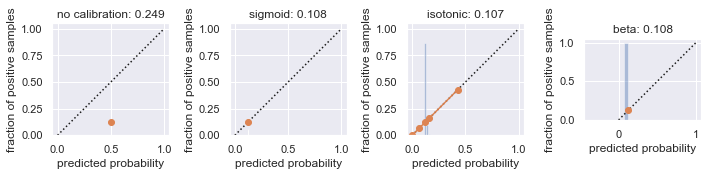

In [121]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_lr[:, 1], scores_lr_sigm[:, 1], scores_lr_iso[:, 1], scores_lr_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

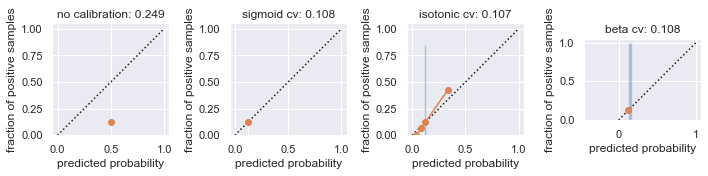

In [122]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration','sigmoid cv', 'isotonic cv','beta cv'],
                       [scores_lr[:, 1], scores_lr_sigm_cv[:, 1], scores_lr_iso_cv[:, 1], scores_lr_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [123]:
pECE(y_test.values, scores_lr_sigm[:,1])

0.99775

In [124]:
pECE(y_test.values, scores_lr_sigm_cv[:,1])

0.56265

In [125]:
pECE(y_test.values, scores_lr_iso[:,1])

1.0

In [126]:
pECE(y_test.values, scores_lr_iso_cv[:,1])

0.6599

In [127]:
pECE(y_test.values, scores_lr_beta[:,1])

0.5643

In [128]:
pECE(y_test.values, scores_lr_beta_cv[:,1])

0.99715

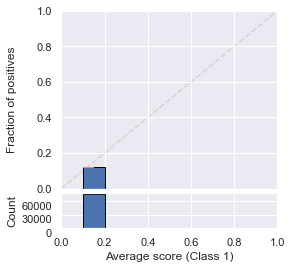

In [129]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_beta.png')

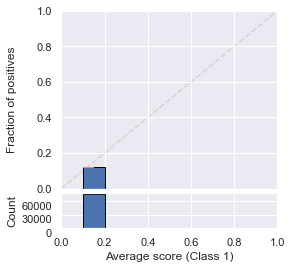

In [130]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_beta_cv.png')

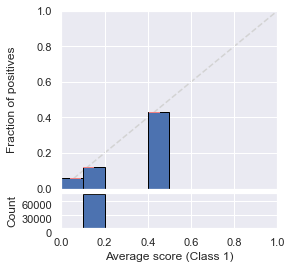

In [131]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_iso.png')

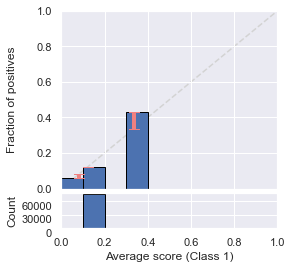

In [132]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_iso_cv.png')

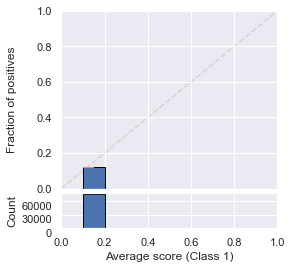

In [133]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_sigm.png')

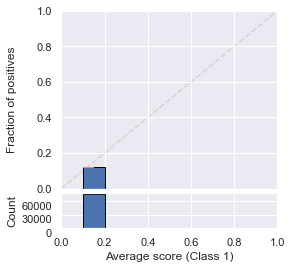

In [134]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_lr_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('lr_sigm_cv.png')

## 2. KNN

In [135]:
# sigmoid
cal_knn_sigm = CalibratedClassifierCV(knn_clf, cv="prefit", method='sigmoid')
cal_knn_sigm.fit(X_test, y_test)
scores_knn_sigm = cal_knn_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_sigm_cv = CalibratedClassifierCV(knn_clf, method='sigmoid')
cal_knn_sigm_cv.fit(X_train, y_train)
scores_knn_sigm_cv = cal_knn_sigm_cv.predict_proba(X_test)

# isotonic
cal_knn_iso = CalibratedClassifierCV(knn_clf, cv="prefit", method='isotonic')
cal_knn_iso.fit(X_test, y_test)
scores_knn_iso = cal_knn_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_iso_cv = CalibratedClassifierCV(knn_clf, method='isotonic')
cal_knn_iso_cv.fit(X_train, y_train)
scores_knn_iso_cv = cal_knn_iso_cv.predict_proba(X_test)

# beta
cal_knn_beta = CalibratedClassifierCV(knn_clf, method='beta')
cal_knn_beta.fit(X_train, y_train)
scores_knn_beta = cal_knn_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_knn_beta_cv = CalibratedClassifierCV(knn_clf, cv="prefit", method='beta')
cal_knn_beta_cv.fit(X_test, y_test)
scores_knn_beta_cv = cal_knn_beta_cv.predict_proba(X_test)

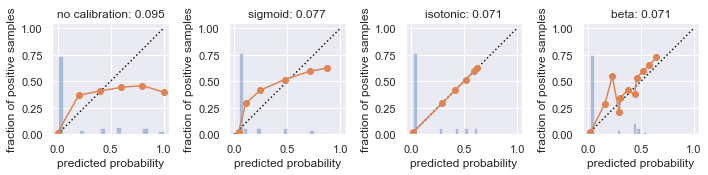

In [136]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_knn[:, 1], scores_knn_sigm[:, 1], scores_knn_iso[:, 1], scores_knn_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

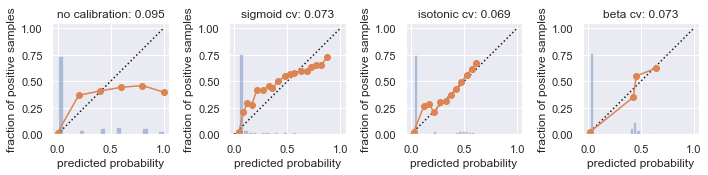

In [137]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_knn[:, 1], scores_knn_sigm_cv[:, 1], scores_knn_iso_cv[:, 1], scores_knn_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [138]:
pECE(y_test.values, scores_knn_sigm[:,1])

0.0

In [139]:
pECE(y_test.values, scores_knn_sigm_cv[:,1])

0.0

In [140]:
pECE(y_test.values, scores_knn_iso[:,1])

1.0

In [141]:
pECE(y_test.values, scores_knn_iso_cv[:,1])

0.0

In [142]:
pECE(y_test.values, scores_knn_beta[:,1])

0.0

In [143]:
pECE(y_test.values, scores_knn_beta_cv[:,1])

0.8401

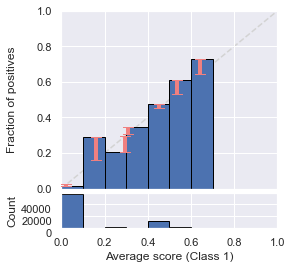

In [144]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_beta.png')

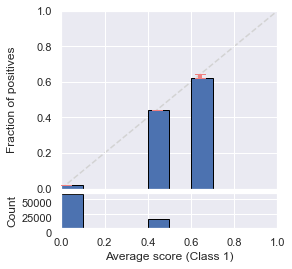

In [145]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_beta_cv.png')

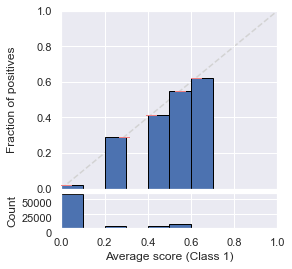

In [146]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_iso.png')

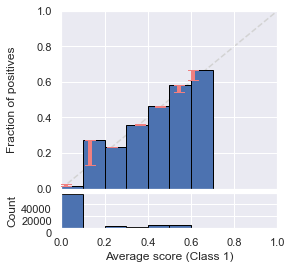

In [147]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_iso_cv.png')

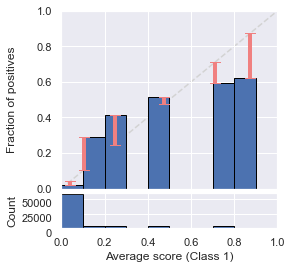

In [148]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_sigm.png')

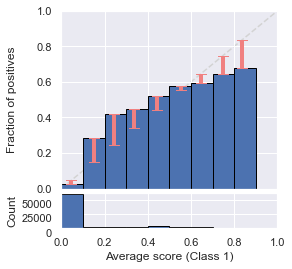

In [149]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_knn_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('knn_sigm_cv.png')

## 3. RF

In [150]:
# sigmoid
cal_rf_sigm = CalibratedClassifierCV(rf_clf, cv="prefit", method='sigmoid')
cal_rf_sigm.fit(X_test, y_test)
scores_rf_sigm = cal_rf_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_rf_sigm_cv = CalibratedClassifierCV(rf_clf, method='sigmoid')
cal_rf_sigm_cv.fit(X_train, y_train)
scores_rf_sigm_cv = cal_rf_sigm_cv.predict_proba(X_test)

# isotonic
cal_rf_iso = CalibratedClassifierCV(rf_clf, cv="prefit", method='isotonic')
cal_rf_iso.fit(X_test, y_test)
scores_rf_iso = cal_rf_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_rf_iso_cv = CalibratedClassifierCV(rf_clf, method='isotonic')
cal_rf_iso_cv.fit(X_train, y_train)
scores_rf_iso_cv = cal_rf_iso_cv.predict_proba(X_test)

# beta
cal_rf_beta = CalibratedClassifierCV(rf_clf, method='beta')
cal_rf_beta.fit(X_train, y_train)
scores_rf_beta = cal_rf_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_rf_beta_cv = CalibratedClassifierCV(rf_clf, cv="prefit", method='beta')
cal_rf_beta_cv.fit(X_test, y_test)
scores_rf_beta_cv = cal_rf_beta_cv.predict_proba(X_test)

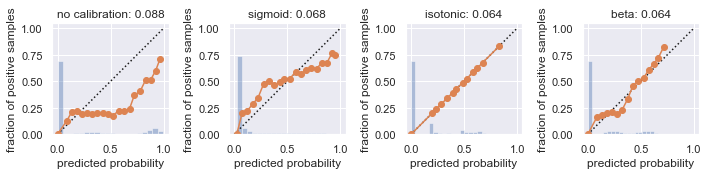

In [151]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_rf[:, 1], scores_rf_sigm[:, 1], scores_rf_iso[:, 1], scores_rf_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

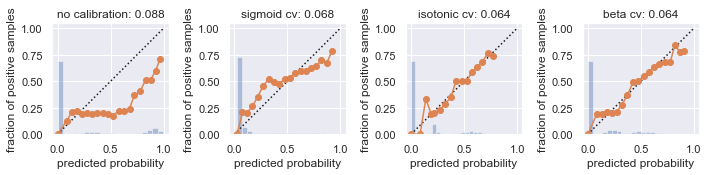

In [152]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_rf[:, 1], scores_rf_sigm_cv[:, 1], scores_rf_iso_cv[:, 1], scores_rf_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [153]:
pECE(y_test.values, scores_rf_sigm[:,1])

0.0

In [154]:
pECE(y_test.values, scores_rf_sigm_cv[:,1])

0.0

In [155]:
pECE(y_test.values, scores_rf_iso[:,1])

1.0

In [156]:
pECE(y_test.values, scores_rf_iso_cv[:,1])

0.0

In [157]:
pECE(y_test.values, scores_rf_beta[:,1])

0.0

In [158]:
pECE(y_test.values, scores_rf_beta_cv[:,1])

0.0

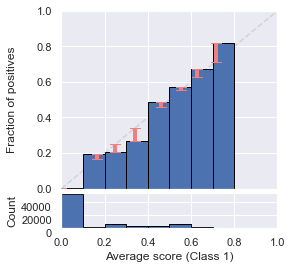

In [159]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf_beta.png')

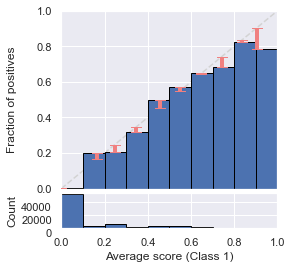

In [160]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf_beta_cv.png')

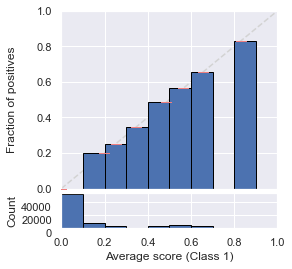

In [161]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf_iso.png')

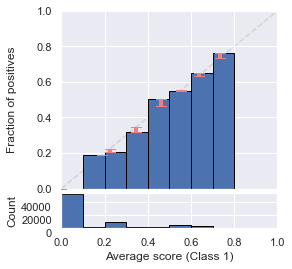

In [162]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf_iso_cv.png')

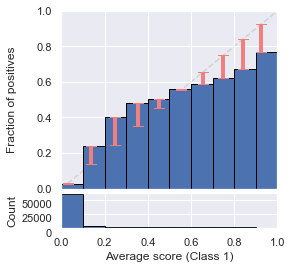

In [163]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf_sigm.png')

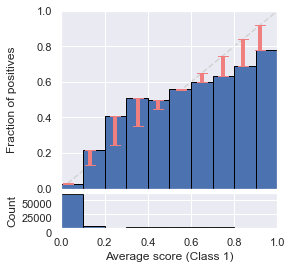

In [164]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_rf_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('rf_sigm_cv.png')

## 4. DT

In [165]:
# sigmoid
cal_dt_sigm = CalibratedClassifierCV(dt_clf, cv="prefit", method='sigmoid')
cal_dt_sigm.fit(X_test, y_test)
scores_dt_sigm = cal_dt_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_dt_sigm_cv = CalibratedClassifierCV(dt_clf, method='sigmoid')
cal_dt_sigm_cv.fit(X_train, y_train)
scores_dt_sigm_cv = cal_dt_sigm_cv.predict_proba(X_test)

# isotonic
cal_dt_iso = CalibratedClassifierCV(dt_clf, cv="prefit", method='isotonic')
cal_dt_iso.fit(X_test, y_test)
scores_dt_iso = cal_dt_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_dt_iso_cv = CalibratedClassifierCV(dt_clf, method='isotonic')
cal_dt_iso_cv.fit(X_train, y_train)
scores_dt_iso_cv = cal_dt_iso_cv.predict_proba(X_test)

# beta
cal_dt_beta = CalibratedClassifierCV(dt_clf, method='beta')
cal_dt_beta.fit(X_train, y_train)
scores_dt_beta = cal_dt_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_dt_beta_cv = CalibratedClassifierCV(dt_clf, cv="prefit", method='beta')
cal_dt_beta_cv.fit(X_test, y_test)
scores_dt_beta_cv = cal_dt_beta_cv.predict_proba(X_test)

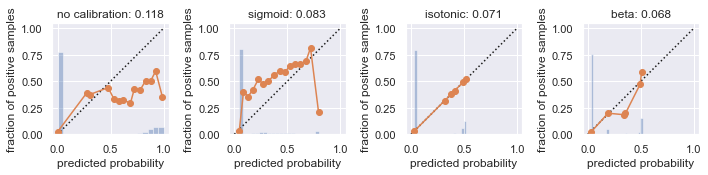

In [166]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_dt[:, 1], scores_dt_sigm[:, 1], scores_dt_iso[:, 1], scores_dt_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

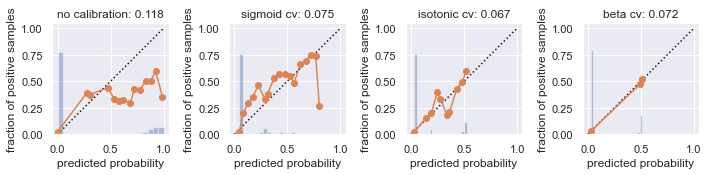

In [167]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_dt[:, 1], scores_dt_sigm_cv[:, 1], scores_dt_iso_cv[:, 1], scores_dt_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [168]:
pECE(y_test.values, scores_dt_sigm[:,1])

0.0

In [169]:
pECE(y_test.values, scores_dt_sigm_cv[:,1])

0.0

In [170]:
pECE(y_test.values, scores_dt_iso[:,1])

1.0

In [171]:
pECE(y_test.values, scores_dt_iso_cv[:,1])

0.0

In [172]:
pECE(y_test.values, scores_dt_beta[:,1])

0.0

In [173]:
pECE(y_test.values, scores_dt_beta_cv[:,1])

0.9921

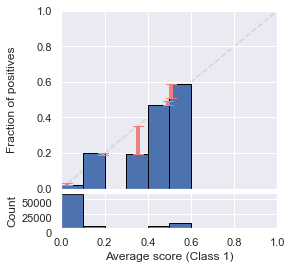

In [174]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_beta.png')

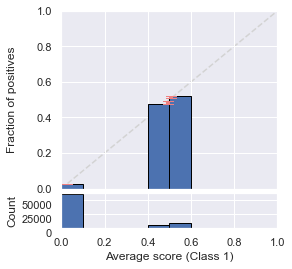

In [175]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_beta_cv.png')

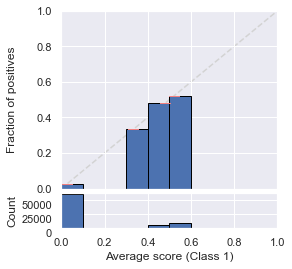

In [176]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_iso.png')

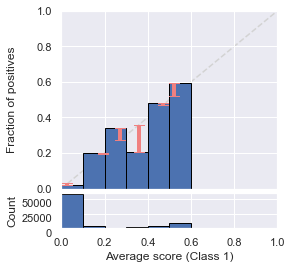

In [177]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_iso_cv.png')

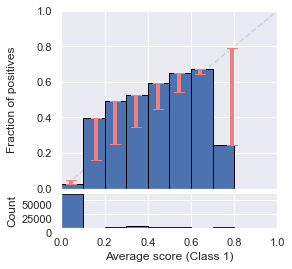

In [178]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_sigm.png')

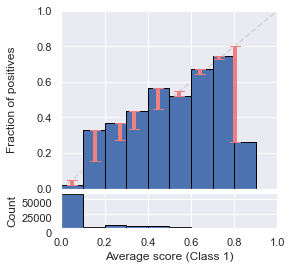

In [179]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_dt_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('dt_sigm_cv.png')

## 5. XGB

In [180]:
# sigmoid
cal_xgb_sigm = CalibratedClassifierCV(xgb, cv="prefit", method='sigmoid')
cal_xgb_sigm.fit(X_test, y_test)
scores_xgb_sigm = cal_xgb_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_xgb_sigm_cv = CalibratedClassifierCV(xgb, method='sigmoid')
cal_xgb_sigm_cv.fit(X_train, y_train)
scores_xgb_sigm_cv = cal_xgb_sigm_cv.predict_proba(X_test)

# isotonic
cal_xgb_iso = CalibratedClassifierCV(xgb, cv="prefit", method='isotonic')
cal_xgb_iso.fit(X_test, y_test)
scores_xgb_iso = cal_xgb_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_xgb_iso_cv = CalibratedClassifierCV(xgb, method='isotonic')
cal_xgb_iso_cv.fit(X_train, y_train)
scores_xgb_iso_cv = cal_xgb_iso_cv.predict_proba(X_test)

# beta
cal_xgb_beta = CalibratedClassifierCV(xgb, method='beta')
cal_xgb_beta.fit(X_train, y_train)
scores_xgb_beta = cal_xgb_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_xgb_beta_cv = CalibratedClassifierCV(xgb, cv="prefit", method='beta')
cal_xgb_beta_cv.fit(X_test, y_test)
scores_xgb_beta_cv = cal_xgb_beta_cv.predict_proba(X_test)

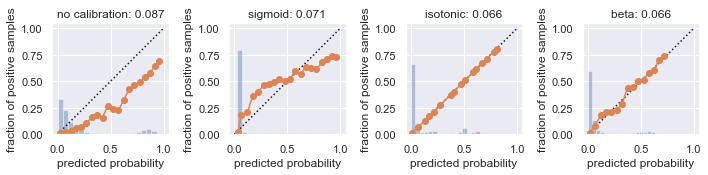

In [181]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_xgb[:, 1], scores_xgb_sigm[:, 1], scores_xgb_iso[:, 1], scores_xgb_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

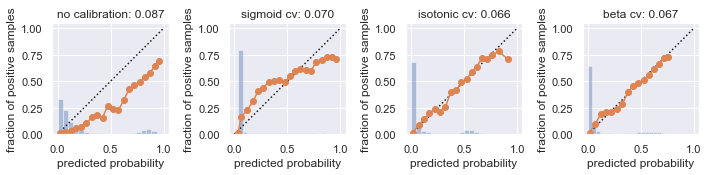

In [182]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_xgb[:, 1], scores_xgb_sigm_cv[:, 1], scores_xgb_iso_cv[:, 1], scores_xgb_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [183]:
pECE(y_test.values, scores_xgb_sigm[:,1])

0.0

In [184]:
pECE(y_test.values, scores_xgb_sigm_cv[:,1])

0.0

In [185]:
pECE(y_test.values, scores_xgb_iso[:,1])

1.0

In [186]:
pECE(y_test.values, scores_xgb_iso_cv[:,1])

0.0

In [187]:
pECE(y_test.values, scores_xgb_beta[:,1])

0.0

In [188]:
pECE(y_test.values, scores_xgb_beta_cv[:,1])

0.0

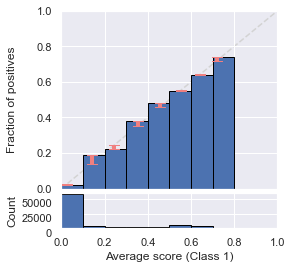

In [189]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb_beta.png')

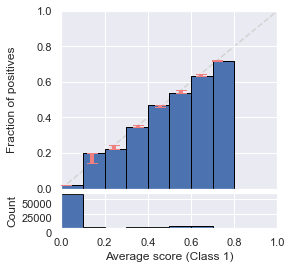

In [190]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb_beta_cv.png')

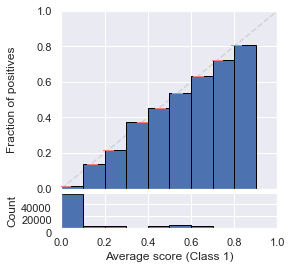

In [191]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb_iso.png')

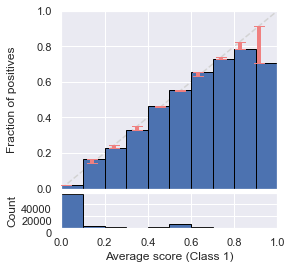

In [192]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb_iso_cv.png')

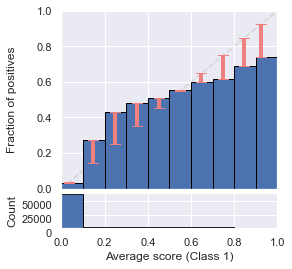

In [193]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb_sigm.png')

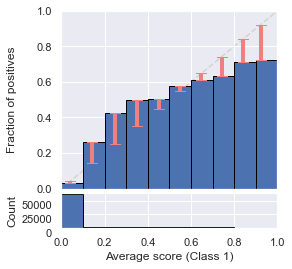

In [194]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_xgb_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('xgb_sigm_cv.png')

## 6. ADA

In [195]:
# sigmoid
cal_ada_sigm = CalibratedClassifierCV(ada, cv="prefit", method='sigmoid')
cal_ada_sigm.fit(X_test, y_test)
scores_ada_sigm = cal_ada_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_ada_sigm_cv = CalibratedClassifierCV(ada, method='sigmoid')
cal_ada_sigm_cv.fit(X_train, y_train)
scores_ada_sigm_cv = cal_ada_sigm_cv.predict_proba(X_test)

# isotonic
cal_ada_iso = CalibratedClassifierCV(ada, cv="prefit", method='isotonic')
cal_ada_iso.fit(X_test, y_test)
scores_ada_iso = cal_ada_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_ada_iso_cv = CalibratedClassifierCV(ada, method='isotonic')
cal_ada_iso_cv.fit(X_train, y_train)
scores_ada_iso_cv = cal_ada_iso_cv.predict_proba(X_test)

# beta
cal_ada_beta = CalibratedClassifierCV(ada, method='beta')
cal_ada_beta.fit(X_train, y_train)
scores_ada_beta = cal_ada_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_ada_beta_cv = CalibratedClassifierCV(ada, cv="prefit", method='beta')
cal_ada_beta_cv.fit(X_test, y_test)
scores_ada_beta_cv = cal_ada_beta_cv.predict_proba(X_test)

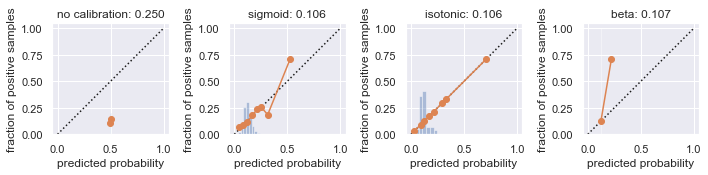

In [196]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_ada[:, 1], scores_ada_sigm[:, 1], scores_ada_iso[:, 1], scores_ada_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

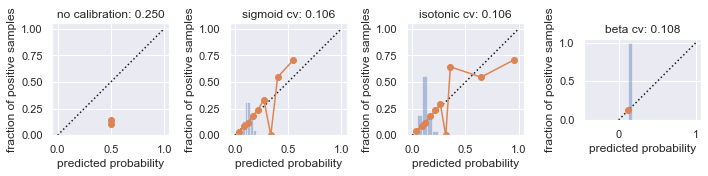

In [197]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_ada[:, 1], scores_ada_sigm_cv[:, 1], scores_ada_iso_cv[:, 1], scores_ada_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [198]:
pECE(y_test.values, scores_ada_sigm[:,1])

0.2598999999999999

In [199]:
pECE(y_test.values, scores_ada_sigm_cv[:,1])

0.00010000000000010001

In [200]:
pECE(y_test.values, scores_ada_iso[:,1])

1.0

In [201]:
pECE(y_test.values, scores_ada_iso_cv[:,1])

0.017699999999999938

In [202]:
pECE(y_test.values, scores_ada_beta[:,1])

0.45520000000000005

In [203]:
pECE(y_test.values, scores_ada_beta_cv[:,1])

0.99755

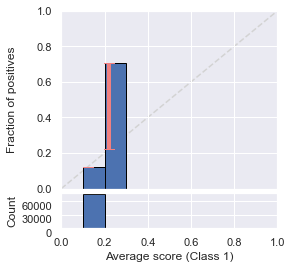

In [204]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada_beta.png')

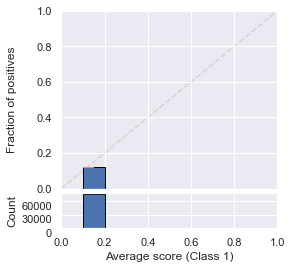

In [205]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada_beta_cv.png')

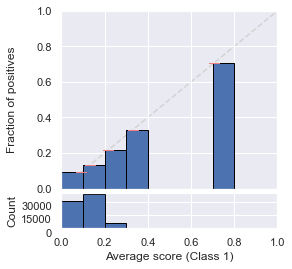

In [206]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada_iso.png')

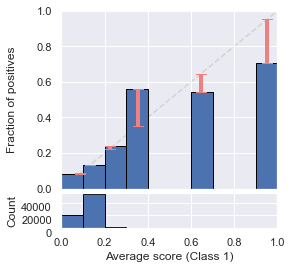

In [207]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada_iso_cv.png')

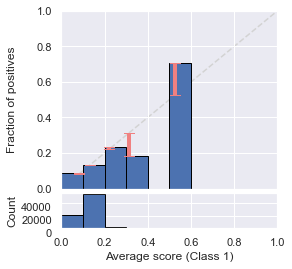

In [208]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada_sigm.png')

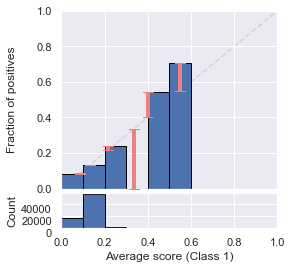

In [209]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_ada_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('ada_sigm_cv.png')

## 7. Bagging

In [210]:
# sigmoid
cal_bag_sigm = CalibratedClassifierCV(bag, cv="prefit", method='sigmoid')
cal_bag_sigm.fit(X_test, y_test)
scores_bag_sigm = cal_bag_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_bag_sigm_cv = CalibratedClassifierCV(bag, method='sigmoid')
cal_bag_sigm_cv.fit(X_train, y_train)
scores_bag_sigm_cv = cal_bag_sigm_cv.predict_proba(X_test)

# isotonic
cal_bag_iso = CalibratedClassifierCV(bag, cv="prefit", method='isotonic')
cal_bag_iso.fit(X_test, y_test)
scores_bag_iso = cal_bag_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_bag_iso_cv = CalibratedClassifierCV(bag, method='isotonic')
cal_bag_iso_cv.fit(X_train, y_train)
scores_bag_iso_cv = cal_bag_iso_cv.predict_proba(X_test)

# beta
cal_bag_beta = CalibratedClassifierCV(bag, method='beta')
cal_bag_beta.fit(X_train, y_train)
scores_bag_beta = cal_bag_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_bag_beta_cv = CalibratedClassifierCV(bag, cv="prefit", method='beta')
cal_bag_beta_cv.fit(X_test, y_test)
scores_bag_beta_cv = cal_bag_beta_cv.predict_proba(X_test)

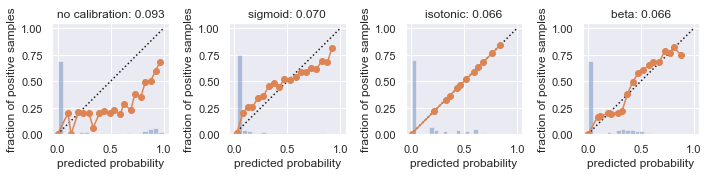

In [211]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_bag[:, 1], scores_bag_sigm[:, 1], scores_bag_iso[:, 1], scores_bag_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

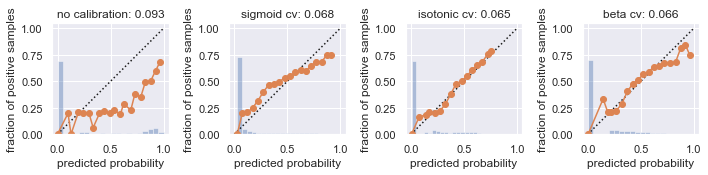

In [212]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_bag[:, 1], scores_bag_sigm_cv[:, 1], scores_bag_iso_cv[:, 1], scores_bag_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [213]:
pECE(y_test.values, scores_bag_sigm[:,1])

0.0

In [214]:
pECE(y_test.values, scores_bag_sigm_cv[:,1])

0.0

In [215]:
pECE(y_test.values, scores_bag_iso[:,1])

1.0

In [216]:
pECE(y_test.values, scores_bag_iso_cv[:,1])

0.0

In [217]:
pECE(y_test.values, scores_bag_beta[:,1])

0.0

In [218]:
pECE(y_test.values, scores_bag_beta_cv[:,1])

0.0

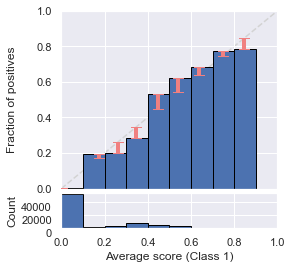

In [219]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag_beta.png')

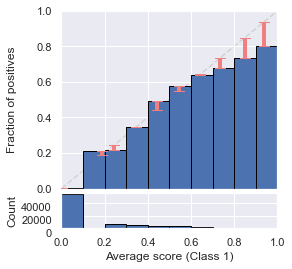

In [220]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag_beta_cv.png')

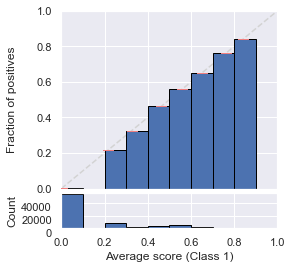

In [221]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag_iso.png')

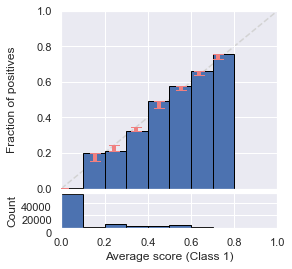

In [222]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag_iso_cv.png')

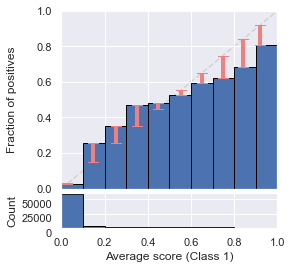

In [223]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag_sigm.png')

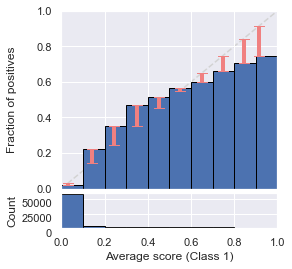

In [224]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_bag_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('bag_sigm_cv.png')

## 8. GB

In [225]:
# sigmoid
cal_gb_sigm = CalibratedClassifierCV(gb, cv="prefit", method='sigmoid')
cal_gb_sigm.fit(X_test, y_test)
scores_gb_sigm = cal_gb_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_gb_sigm_cv = CalibratedClassifierCV(gb, method='sigmoid')
cal_gb_sigm_cv.fit(X_train, y_train)
scores_gb_sigm_cv = cal_gb_sigm_cv.predict_proba(X_test)

# isotonic
cal_gb_iso = CalibratedClassifierCV(gb, cv="prefit", method='isotonic')
cal_gb_iso.fit(X_test, y_test)
scores_gb_iso = cal_gb_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_gb_iso_cv = CalibratedClassifierCV(gb, method='isotonic')
cal_gb_iso_cv.fit(X_train, y_train)
scores_gb_iso_cv = cal_gb_iso_cv.predict_proba(X_test)

# beta
cal_gb_beta = CalibratedClassifierCV(gb, method='beta')
cal_gb_beta.fit(X_train, y_train)
scores_gb_beta = cal_gb_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_gb_beta_cv = CalibratedClassifierCV(gb, cv="prefit", method='beta')
cal_gb_beta_cv.fit(X_test, y_test)
scores_gb_beta_cv = cal_gb_beta_cv.predict_proba(X_test)

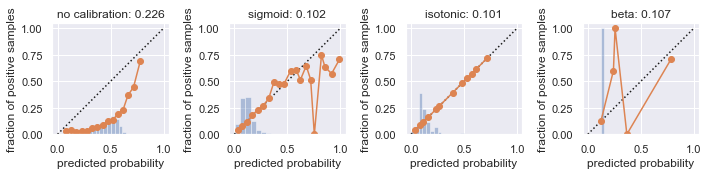

In [226]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_gb[:, 1], scores_gb_sigm[:, 1], scores_gb_iso[:, 1], scores_gb_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

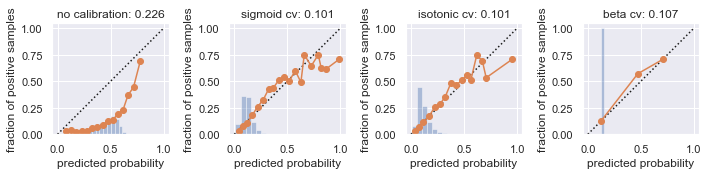

In [227]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_gb[:, 1], scores_gb_sigm_cv[:, 1], scores_gb_iso_cv[:, 1], scores_gb_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [228]:
pECE(y_test.values, scores_gb_sigm[:,1])

0.0015999999999999348

In [229]:
pECE(y_test.values, scores_gb_sigm_cv[:,1])

0.0

In [230]:
pECE(y_test.values, scores_gb_iso[:,1])

1.0

In [231]:
pECE(y_test.values, scores_gb_iso_cv[:,1])

0.0

In [232]:
pECE(y_test.values, scores_gb_beta[:,1])

0.4718

In [233]:
pECE(y_test.values, scores_gb_beta_cv[:,1])

0.99815

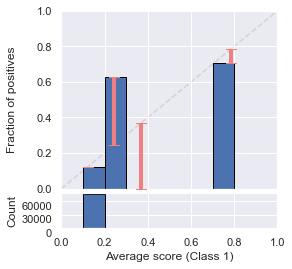

In [234]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb_beta.png')

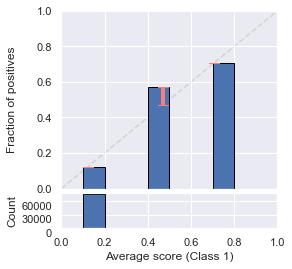

In [235]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb_beta_cv.png')

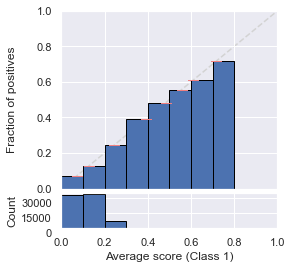

In [236]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb_iso.png')

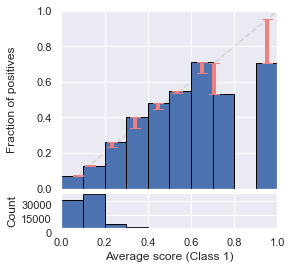

In [237]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb_iso_cv.png')

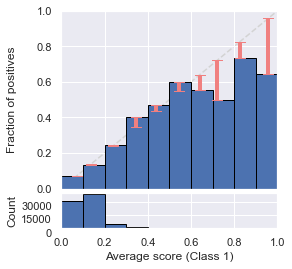

In [238]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb_sigm.png')

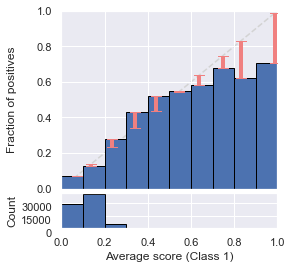

In [239]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_gb_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('gb_sigm_cv.png')

## 9. ET

In [240]:
# sigmoid
cal_et_sigm = CalibratedClassifierCV(extra, cv="prefit", method='sigmoid')
cal_et_sigm.fit(X_test, y_test)
scores_et_sigm = cal_et_sigm.predict_proba(X_test)

# Cross-validated Calibration
cal_et_sigm_cv = CalibratedClassifierCV(extra, method='sigmoid')
cal_et_sigm_cv.fit(X_train, y_train)
scores_et_sigm_cv = cal_et_sigm_cv.predict_proba(X_test)

# isotonic
cal_et_iso = CalibratedClassifierCV(extra, cv="prefit", method='isotonic')
cal_et_iso.fit(X_test, y_test)
scores_et_iso = cal_et_iso.predict_proba(X_test)

# Cross-validated Calibration
cal_et_iso_cv = CalibratedClassifierCV(extra, method='isotonic')
cal_et_iso_cv.fit(X_train, y_train)
scores_et_iso_cv = cal_et_iso_cv.predict_proba(X_test)

# beta
cal_et_beta = CalibratedClassifierCV(extra, method='beta')
cal_et_beta.fit(X_train, y_train)
scores_et_beta = cal_et_beta.predict_proba(X_test)

# Cross-validated Calibration
cal_et_beta_cv = CalibratedClassifierCV(extra, cv="prefit", method='beta')
cal_et_beta_cv.fit(X_test, y_test)
scores_et_beta_cv = cal_et_beta_cv.predict_proba(X_test)

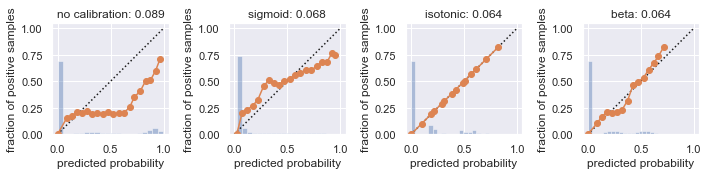

In [241]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid', 'isotonic', 'beta'],
                       [scores_extra[:, 1], scores_et_sigm[:, 1], scores_et_iso[:, 1], scores_et_beta[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

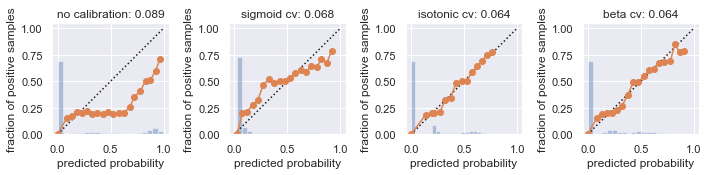

In [242]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

for name, s, ax in zip(['no calibration', 'sigmoid cv', 'isotonic cv', 'beta cv'],
                       [scores_extra[:, 1], scores_et_sigm_cv[:, 1], scores_et_iso_cv[:, 1], scores_et_beta_cv[:, 1]], axes):
    plot_calibration_curve(y_test, s, n_bins=20, ax=ax)
    ax.set_title("{}: {:.3f}".format(name, brier_score_loss(y_test, s)))
plt.tight_layout()

In [243]:
pECE(y_test.values, scores_et_sigm[:,1])

0.0

In [244]:
pECE(y_test.values, scores_et_sigm_cv[:,1])

0.0

In [245]:
pECE(y_test.values, scores_et_iso[:,1])

1.0

In [246]:
pECE(y_test.values, scores_et_iso_cv[:,1])

0.0

In [247]:
pECE(y_test.values, scores_et_beta[:,1])

0.0

In [248]:
pECE(y_test.values, scores_et_beta_cv[:,1])

0.0

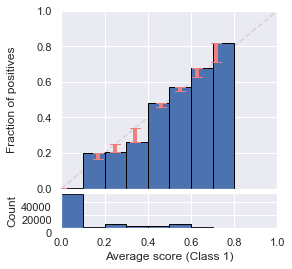

In [249]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_et_beta, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et_beta.png')

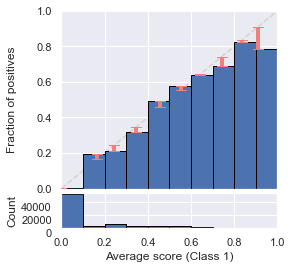

In [250]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_et_beta_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et_beta_cv.png')

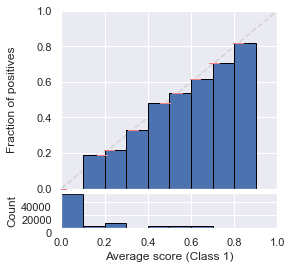

In [251]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_et_iso, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et_iso.png')

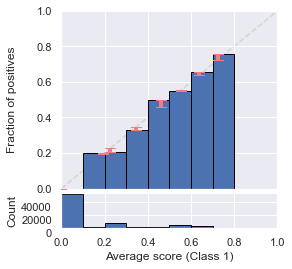

In [252]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_et_iso_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et_iso_cv.png')

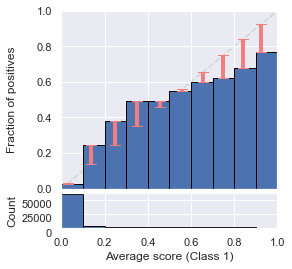

In [253]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_et_sigm, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et_sigm.png')

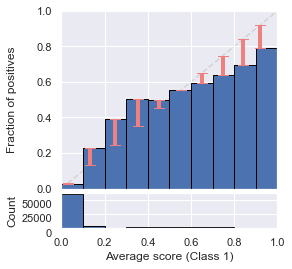

In [254]:
fig = pycalib.visualisations.plot_reliability_diagram(y_test.values,
                                                [scores_et_sigm_cv, ],
                                                legend=None,
                                                show_histogram=True,
                                                bins=10,
                                                class_names=["0","1"],
                                                fig=None,
                                                show_counts=False,
                                                errorbar_interval=None,
                                                interval_method='beta',
                                                fmt='s-',
                                                show_correction=False,
                                                show_gaps=True,
                                                sample_proportion=0,
                                                hist_per_class=False,
                                                color_list=None,
                                                show_bars=True,
                                                invert_histogram=False,
                                                color_gaps='lightcoral',
                                                confidence=False)
fig.savefig('et_sigm_cv.png')